In [18]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the preprocessed dataset
spotify_data = pd.read_csv(
    'dataset/spotify-2023-preprocessed.csv', encoding='ISO-8859-1')

# Displaying basic information about the dataset
spotify_data_info = spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   artist_count               945 non-null    int64  
 1   bpm                        945 non-null    float64
 2   danceability               945 non-null    float64
 3   valence                    945 non-null    float64
 4   energy                     945 non-null    float64
 5   acousticness               945 non-null    float64
 6   instrumentalness           945 non-null    float64
 7   liveness                   945 non-null    float64
 8   speechiness                945 non-null    float64
 9   days_since_release         945 non-null    float64
 10  key_A#                     945 non-null    bool   
 11  key_B                      945 non-null    bool   
 12  key_C                      945 non-null    bool   
 13  key_C#                     945 non-null    bool   

## Histograms

Added `days_since_release` and `platform_presence_summary` to numerical features for distribution analysis.

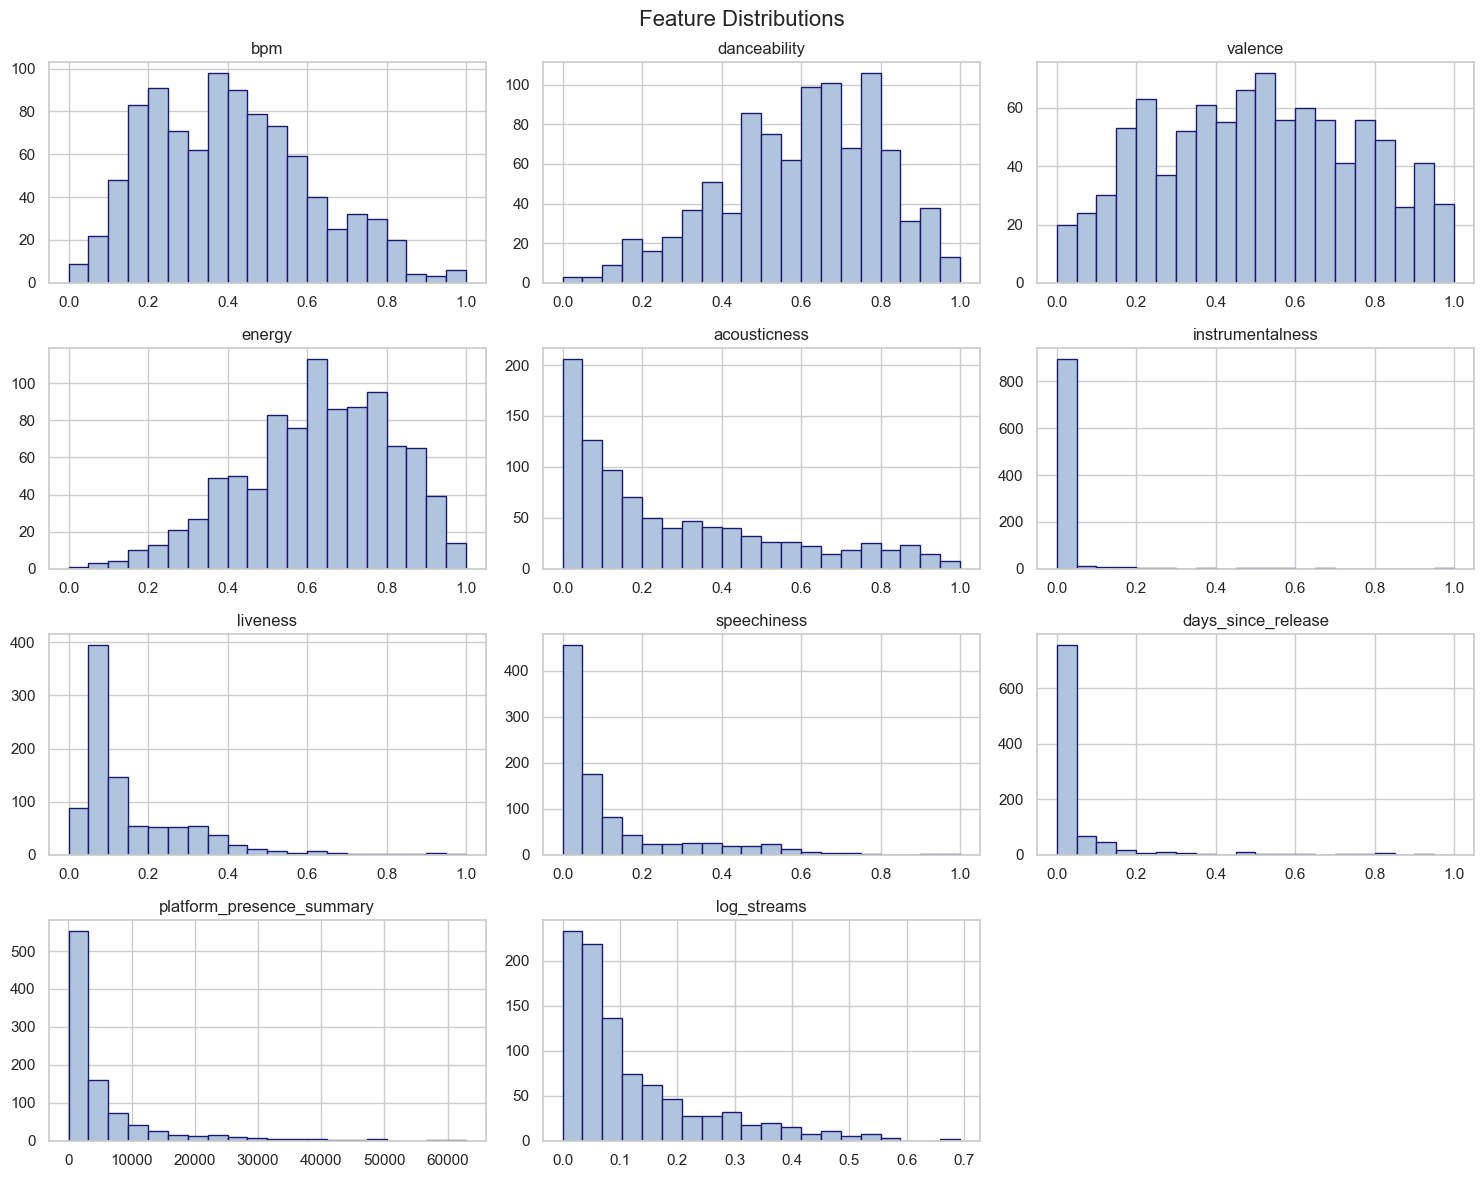

In [19]:
# Set up the plotting style
sns.set_theme(style='whitegrid')

# Select columns for visualization
numerical_features = [
    'bpm', 'danceability', 'valence', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'days_since_release',
    'platform_presence_summary', 'log_streams'
]

# Create histograms for numerical features
spotify_data[numerical_features].hist(
    figsize=(15, 12), bins=20, color='lightsteelblue', edgecolor='midnightblue')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

## Correlation Heatmap

Includes all numerical features, with a focus on correlation involving `log_streams`.

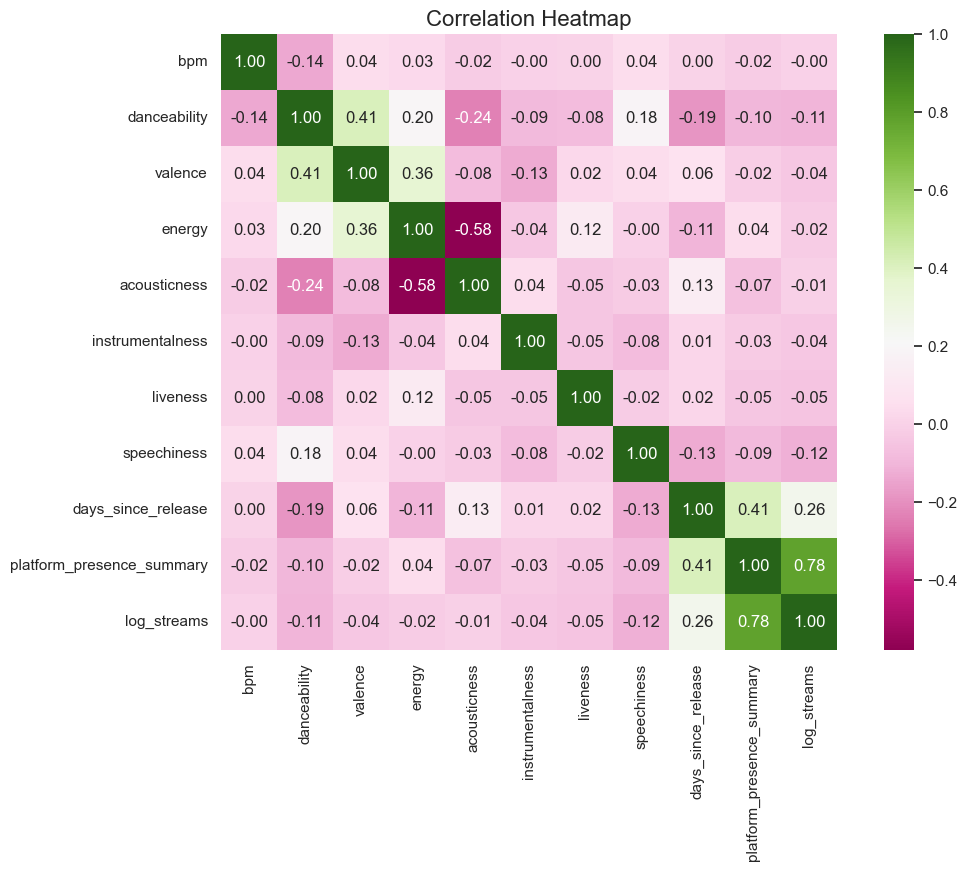

In [20]:
# Correlation heatmap including 'log_streams'
plt.figure(figsize=(12, 8))
correlation_matrix = spotify_data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True,
            fmt='.2f', cmap='PiYG', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Scatter Plots

Plots `log_streams` against key numerical features, reflecting the target transformation.

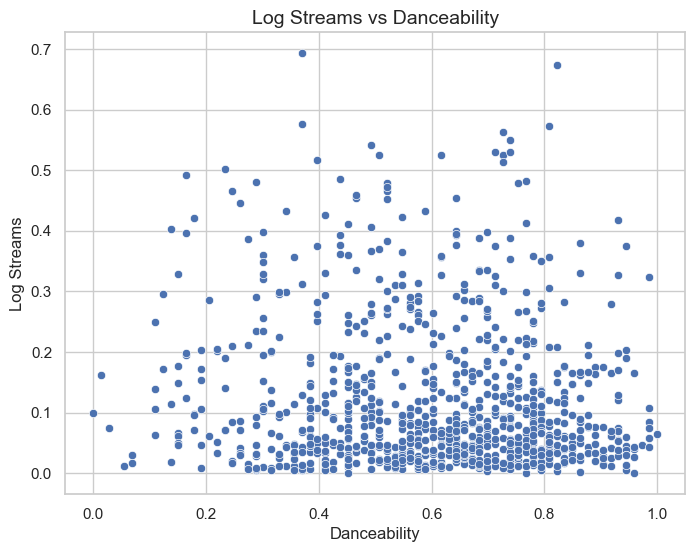

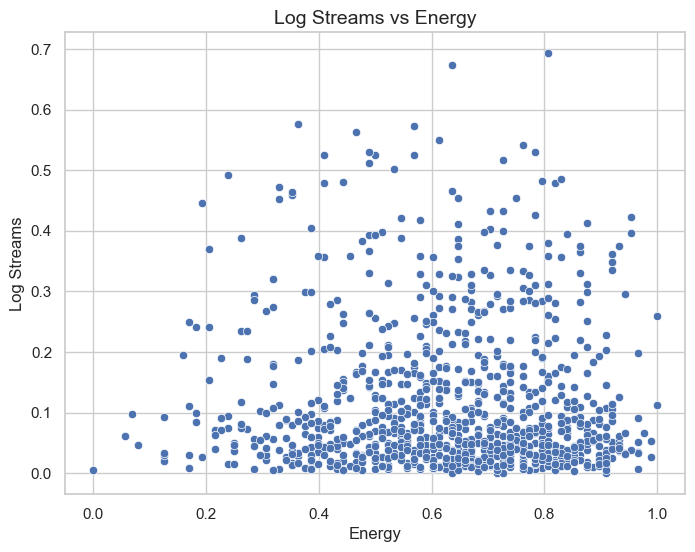

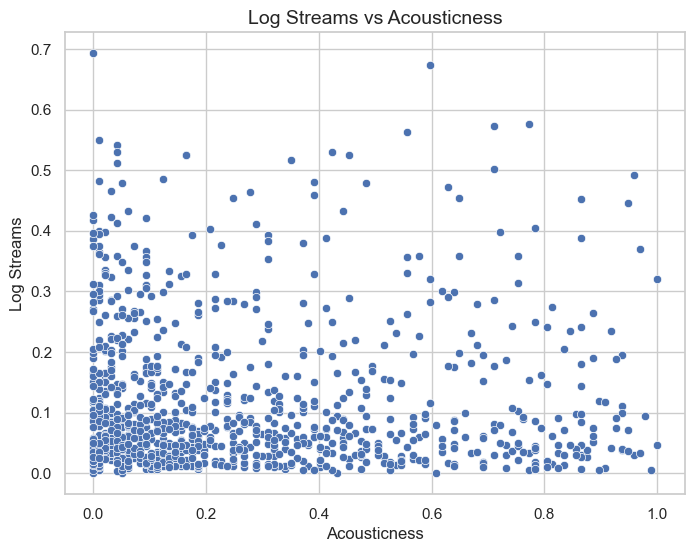

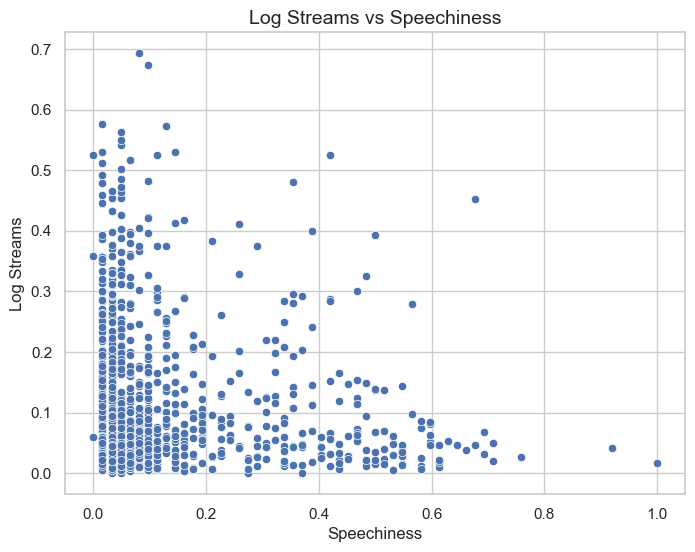

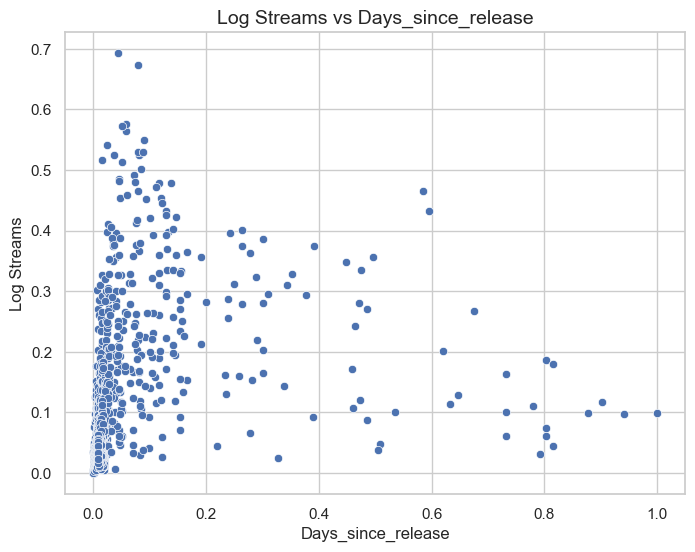

In [21]:
# Scatterplots for 'log_streams' vs. selected audio features
features_to_plot = ['danceability', 'energy',
                    'acousticness', 'speechiness', 'days_since_release']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['log_streams'])
    plt.title(f'Log Streams vs {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Log Streams')
    plt.show()

## Box Plots

Visualizes how boolean categorical features (e.g. `keys` and `modes`) relate to `log_streams`.

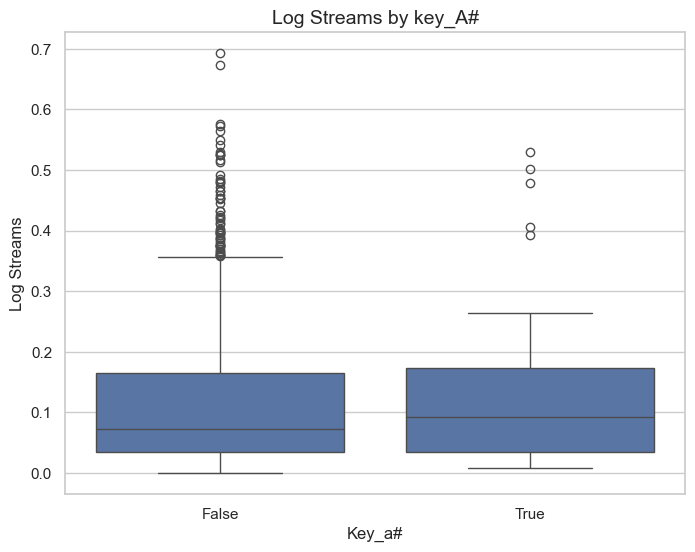

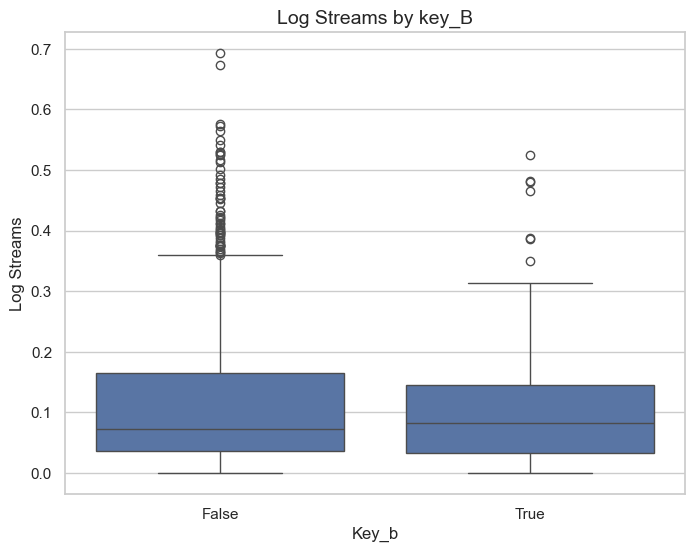

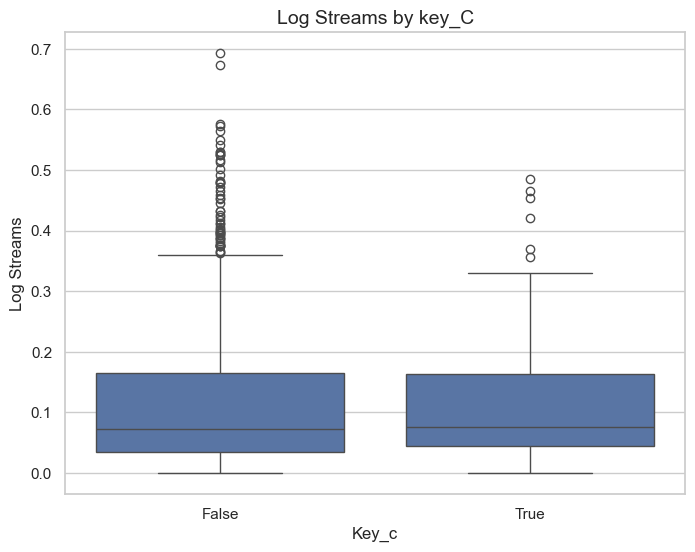

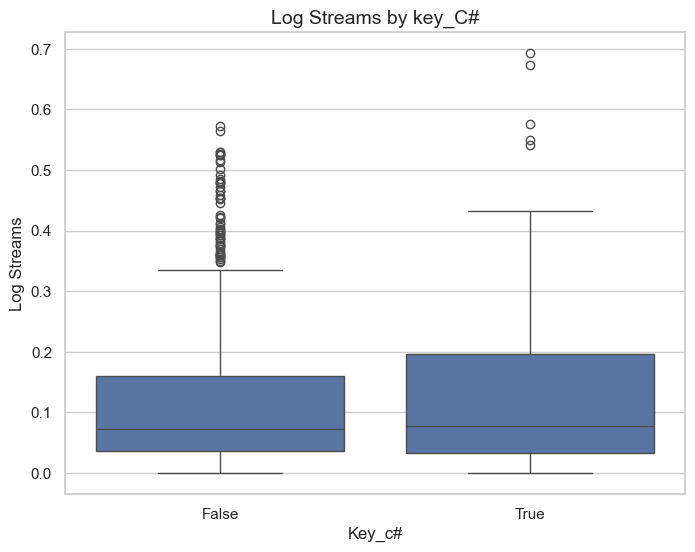

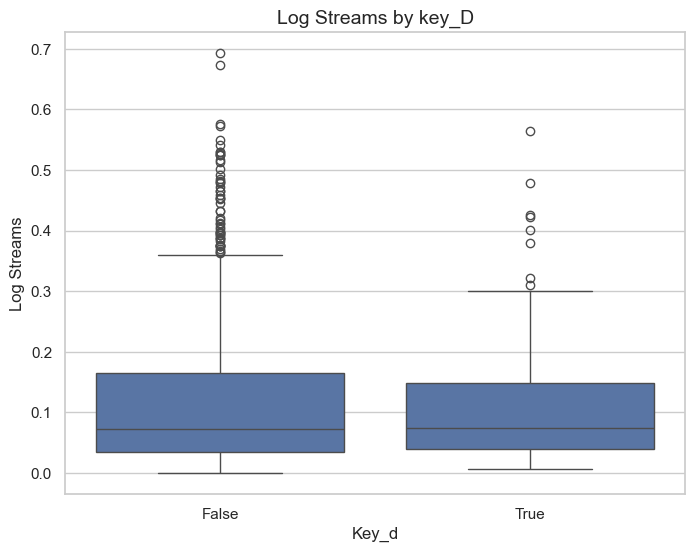

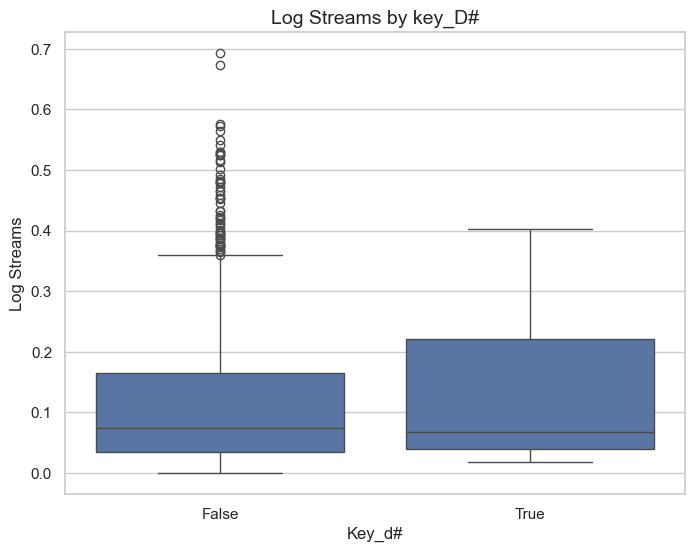

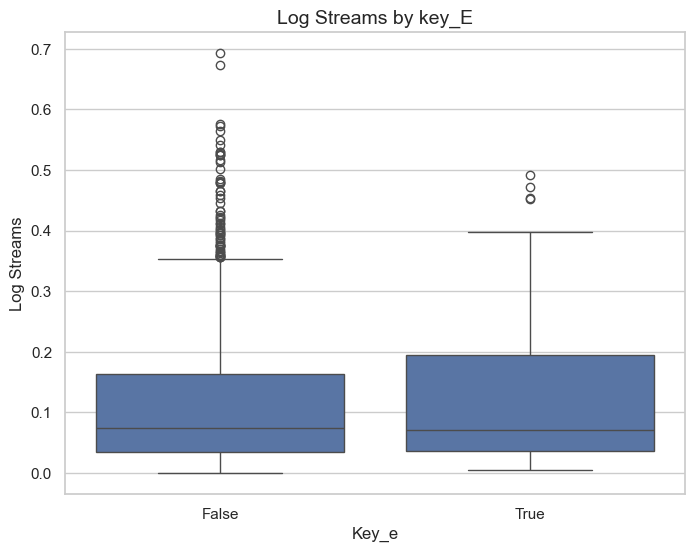

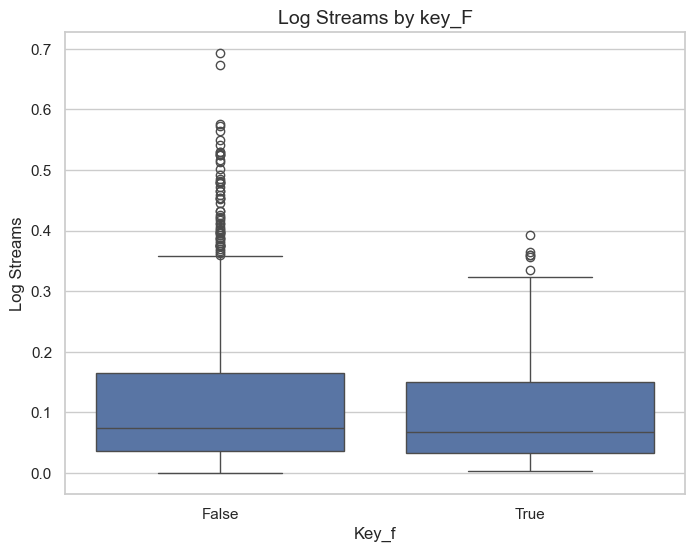

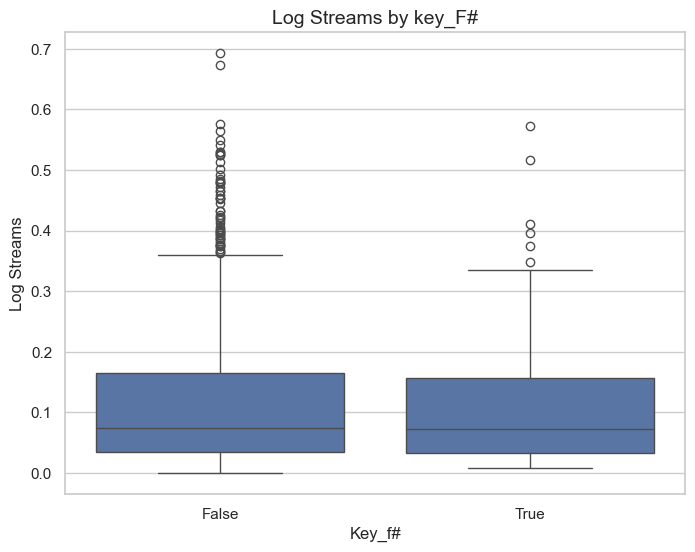

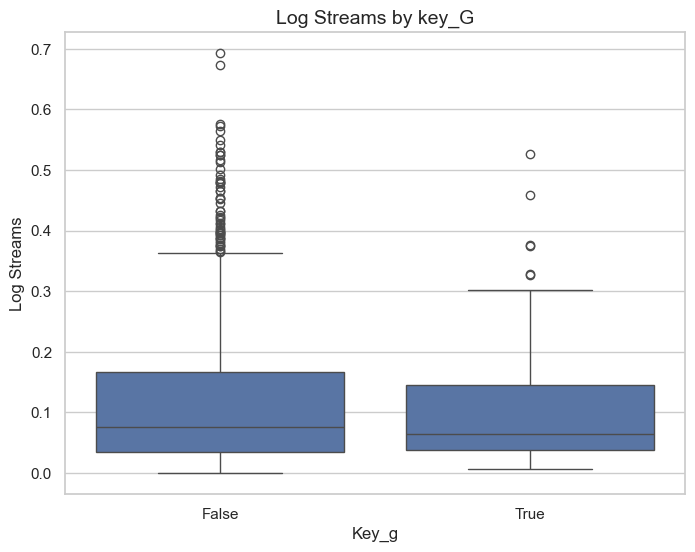

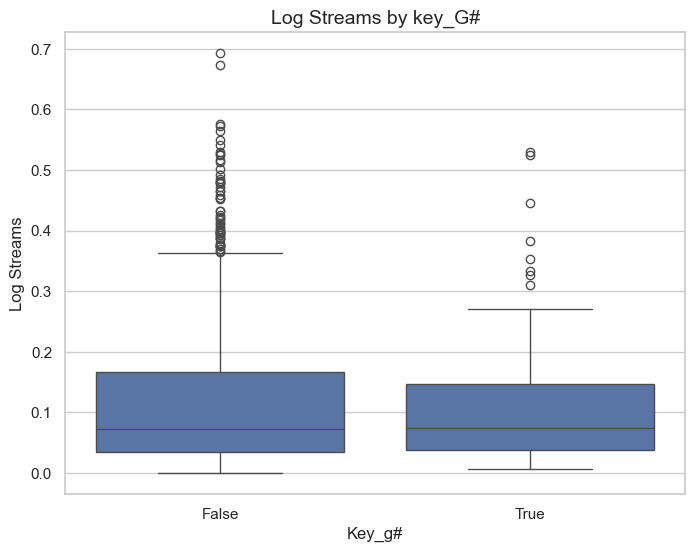

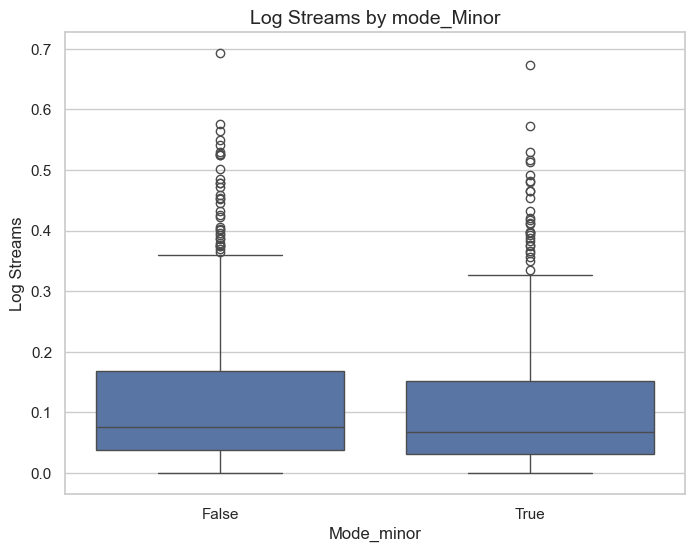

In [22]:
# Boxplots for categorical features (if any)
categorical_features = [
    col for col in spotify_data.columns if spotify_data[col].dtype == 'bool']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=spotify_data[feature], y=spotify_data['log_streams'])
    plt.title(f'Log Streams by {feature}', fontsize=14)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Log Streams')
    plt.show()